In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# --- Đọc dữ liệu ---
df = pd.read_csv("../feature_set/user_feature_set_label.csv")
print(f"Số dòng: {df.shape[0]}, Số cột: {df.shape[1]}")




✅ Đã đọc dữ liệu gốc.
Số dòng: 403465, Số cột: 57


In [5]:
df

,userID,account_age_days,is_new_user,created_during_campaign,phone_provider,usergender,weekday_created,txn_count,txn_days_active,avg_txn_amount,...,cards_per_day,avg_users_per_card,multi_card_flag,shared_card_flag,mapcard_suspicious_flag,txn_spam_index_flag,transfer_spam_index_flag,referral_spam_index_flag,risk_score,isBot
0,c0f75446daa8140e9ef90fb6c73e3a03,2365,0,0,7653,1,3,13.0,3.0,83562.384615,...,1.0,1.0,0.0,1.0,1.0,1,0,0,6.0,0
1,bfd4558e9fba3d36c1c0fdefc6ac2221,2293,0,0,7630,1,5,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
2,8d53ea3f700ecc6bea5811c987470ed6,2288,0,0,7050,1,3,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
3,48b1f4c7b01b16a1fb0b1c23ab29d702,2250,0,0,7589,1,6,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
4,3c73d35390202fb29d855d5a7a806363,2245,0,0,7052,1,4,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403460,35aa20c8f6dfd30e5b4244df601b9328,122,0,1,7022,0,6,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
403461,ac9e18b3bbe99cc32bba12986a8964ee,122,0,1,7605,0,6,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1.0,0
403462,092c8ef59b670554a92cdca204e13cf1,122,0,1,7,0,6,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
403463,1bcd00270e9d7dd45f263335de19860a,121,0,1,7,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0


In [ ]:
# --- Xác định cột mục tiêu ---
target_col = "isBot"
# LƯU LẠI userID TRƯỚC KHI DROP
user_ids = df["userID"].copy()
# --- Loại bỏ các cột không cần thiết ---
drop_cols = [
    'userID',              # ID định danh, không dùng cho model
    'phone_provider',      # categorical không có ý nghĩa định lượng
    'usergender',          # có thể không đóng góp nhiều
    'weekday_created'      # nếu không quan trọng
]

for col in drop_cols:
    if col in df.columns:
        df = df.drop(columns=[col])

In [7]:
df

,account_age_days,is_new_user,created_during_campaign,txn_count,txn_days_active,avg_txn_amount,zero_charge_ratio,discount_ratio,cashback_ratio,unique_apps,...,cards_per_day,avg_users_per_card,multi_card_flag,shared_card_flag,mapcard_suspicious_flag,txn_spam_index_flag,transfer_spam_index_flag,referral_spam_index_flag,risk_score,isBot
0,2365,0,0,13.0,3.0,83562.384615,0.692308,0.923077,1.0,4.0,...,1.0,1.0,0.0,1.0,1.0,1,0,0,6.0,0
1,2293,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
2,2288,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
3,2250,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
4,2245,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403460,122,0,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
403461,122,0,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1.0,0
403462,122,0,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
403463,121,0,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5344\1306286206.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts.values, palette=colors, edgecolor='black')


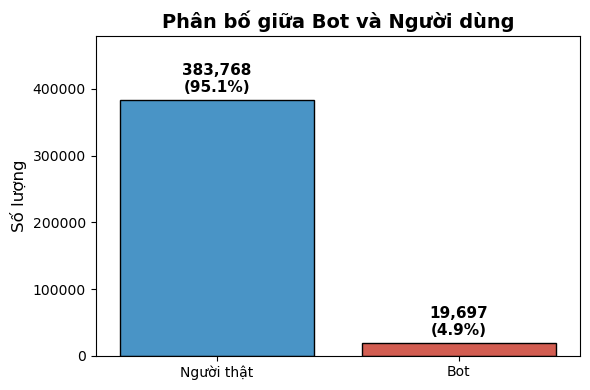

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

counts = df['isBot'].value_counts().sort_index()
labels = ['Người thật', 'Bot']
colors = ['#3498db', '#e74c3c']

plt.figure(figsize=(6,4))
ax = sns.barplot(x=labels, y=counts.values, palette=colors, edgecolor='black')
plt.ylim(0, counts.max()*1.25)  
for i, v in enumerate(counts.values):
    pct = v / counts.sum() * 100
    ax.text(i, v + counts.max()*0.03, f"{v:,}\n({pct:.1f}%)", ha='center',
            fontsize=11, fontweight='bold')

plt.title("Phân bố giữa Bot và Người dùng", fontsize=14, fontweight='bold')
plt.ylabel("Số lượng", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:

y = df["isBot"]
# Còn lại là features
X = df.drop(columns=["isBot"])


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, userID_train, userID_test = train_test_split(
    X,
    y,
    user_ids,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train:", y_train.value_counts(normalize=True))
print("Test:", y_test.value_counts(normalize=True))


Train: isBot
0    0.951179
1    0.048821
Name: proportion, dtype: float64
Test: isBot
0    0.951185
1    0.048815
Name: proportion, dtype: float64


In [11]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.array([0, 1])
weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

weights_dict = {0: weights[0], 1: weights[1]}
weights_dict


{0: np.float64(0.5256633247995205), 1: np.float64(10.241528112704659)}

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(
    class_weight=weights_dict,
    max_iter=1000
)
log_clf.fit(X_train, y_train)


d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: np.float64(0.5256633247995205),
                                 1: np.float64(10.241528112704659)},
                   max_iter=1000)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = log_clf.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[69501  7253]
 [    7  3932]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     76754
           1       0.35      1.00      0.52      3939

    accuracy                           0.91     80693
   macro avg       0.68      0.95      0.74     80693
weighted avg       0.97      0.91      0.93     80693



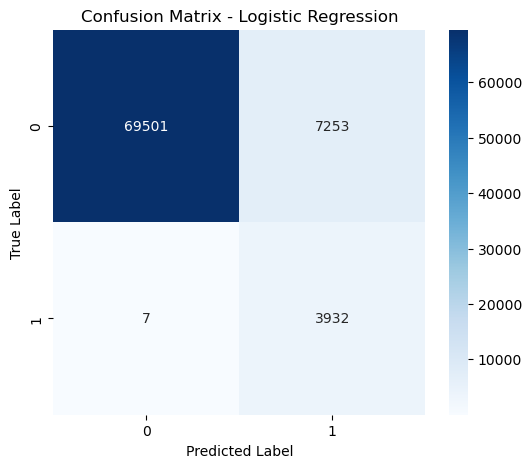

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


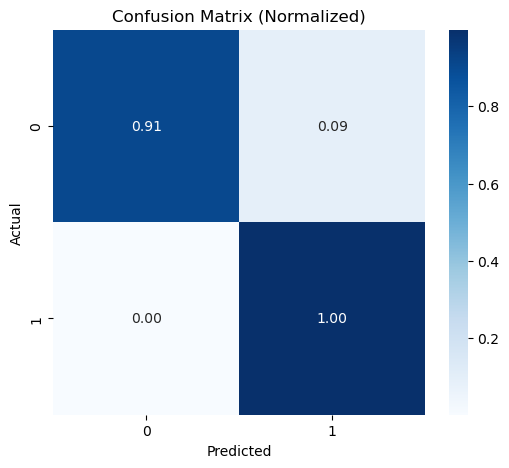

In [16]:
import numpy as np

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap='Blues')
plt.title("Confusion Matrix (Normalized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Fine tune logistic regression?

In [17]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

y_proba = log_clf.predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.05)

best_f1 = 0
best_t = 0.5

print(f"{'Threshold':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10}")
print("-"*50)

for t in thresholds:
    y_pred_adj = (y_proba >= t).astype(int)
    p = precision_score(y_test, y_pred_adj)
    r = recall_score(y_test, y_pred_adj)
    f = f1_score(y_test, y_pred_adj)
    
    print(f"{t:<10.2f} {p:<10.3f} {r:<10.3f} {f:<10.3f}")
    
    if f > best_f1:
        best_f1 = f
        best_t = t

print("\nBest threshold:", best_t, "with F1 =", best_f1)


d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Threshold  Precision  Recall     F1-score  
--------------------------------------------------
0.10       0.051      1.000      0.098     
0.15       0.069      1.000      0.129     
0.20       0.070      1.000      0.132     
0.25       0.097      0.999      0.177     
0.30       0.280      0.999      0.437     
0.35       0.288      0.999      0.447     
0.40       0.293      0.999      0.453     
0.45       0.312      0.999      0.475     
0.50       0.352      0.998      0.520     
0.55       0.429      0.997      0.599     
0.60       0.438      0.997      0.609     
0.65       0.452      0.997      0.622     
0.70       0.467      0.997      0.636     
0.75       0.482      0.996      0.650     
0.80       0.493      0.996      0.660     
0.85       0.511      0.994      0.675     

Best threshold: 0.8500000000000002 with F1 = 0.6753493186130757


In [18]:
best_threshold = 0.85
y_pred_best = (y_proba >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     76754
           1       0.51      0.99      0.68      3939

    accuracy                           0.95     80693
   macro avg       0.76      0.97      0.83     80693
weighted avg       0.98      0.95      0.96     80693

[[73014  3740]
 [   24  3915]]


Confusion Matrix (Fine-tuned Logistic Regression):
[[73014  3740]
 [   24  3915]]


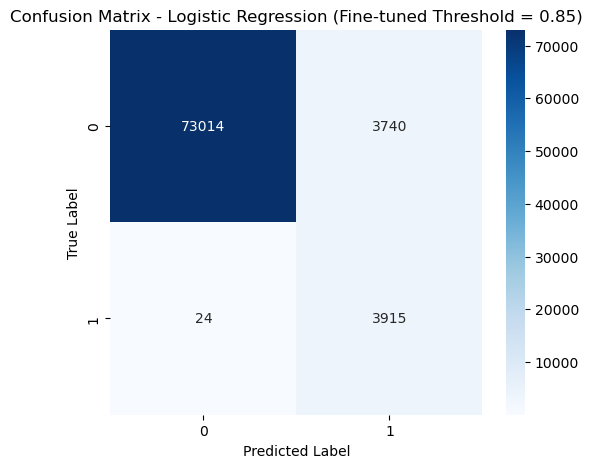

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_best = confusion_matrix(y_test, y_pred_best)

print("Confusion Matrix (Fine-tuned Logistic Regression):")
print(cm_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Fine-tuned Threshold = 0.85)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Tạo bảng data

In [ ]:
import pandas as pd

# === Prediction result ===
df_pred = pd.DataFrame({
    "userID": userID_test.values,
    "pred_label": y_pred_best,
    "pred_prob": y_proba
})

# Chỉ giữ Bot (label = 1)
df_pred_bot = df_pred[df_pred["pred_label"] == 1].copy()

# === Load transaction + campaign info ===
df_txn = pd.read_csv("../cleaned_data/transaction_clean.csv")
df_campaign = pd.read_csv("../cleaned_data/campaign_info_clean.csv")

df_txn["reqDate"] = pd.to_datetime(df_txn["reqDate"])

# Gắn thông tin campaign vào từng giao dịch
df_txn_full = df_txn.merge(df_campaign, on="campaignID", how="left")

# Chỉ lấy giao dịch của những user được model dự đoán là Bot
df_bot_txn = df_pred_bot.merge(df_txn_full, on="userID", how="left")

# === Tính tổng thiệt hại do Bot (tổng discount) ===
loss_table = (
    df_bot_txn.groupby("userID")["discountAmount"]
    .sum()
    .reset_index()
    .rename(columns={"discountAmount": "total_loss"})
)

# === Ngày phát hiện Bot (giao dịch đầu tiên bị coi là gian lận) ===
detected_date = (
    df_bot_txn.groupby("userID")["reqDate"]
    .min()
    .reset_index()
    .rename(columns={"reqDate": "detected_date"})
)

# === Thông tin campaign “đại diện” cho mỗi Bot user
# (lấy giá trị xuất hiện nhiều nhất – mode)
bot_campaign_info = (
    df_bot_txn.groupby("userID")
    .agg({
        "campaignID":   lambda x: x.mode()[0] if len(x.mode()) else None,
        "campaignCode": lambda x: x.mode()[0] if len(x.mode()) else None,
        "promotion_type": lambda x: x.mode()[0] if len(x.mode()) else None,
        "promotionName": lambda x: x.mode()[0] if len(x.mode()) else None,
    })
    .reset_index()
)

# === Tạo bảng bot_user_final (mỗi userID xuất hiện 1 lần) ===
df_bot_final = (
    df_pred_bot
    .merge(loss_table, on="userID", how="left")
    .merge(detected_date, on="userID", how="left")
    .merge(bot_campaign_info, on="userID", how="left")
)

df_bot_final.to_csv("../dashboard/bot_user_final.csv", index=False)
df_bot_final.head()


,userID,pred_label,pred_prob,total_loss,detected_date,campaignID,campaignCode,promotion_type,promotionName
0,52059ad2dfe7c52fd327ab17eaffefaf,1,0.996008,13566.0,2022-03-03 18:24:00,0.0,ZPI_230401_359,cashback,[ZPI_230401_359][MEG_RW_MPU][Miêu thủ săn cá]I...
1,379441d294012c5f97bd91769e3361ea,1,0.998856,44766.0,2022-03-04 16:53:00,0.0,ZPI_230401_359,cashback,[ZPI_230401_359][MEG_RW_MPU][Miêu thủ săn cá]I...
2,6bf4f6593b7df47bd8d4ad368c0a2867,1,0.958620,88700.0,2022-03-04 20:30:00,11453.0,ZPI_230401_359,cashback,[ZPI_230401_359][MEG_RW_MPU][Miêu thủ săn cá]I...
3,7d6ff911b60f4d5e789bdfdde1cc412c,1,0.996090,121400.0,2022-03-20 11:09:00,11453.0,ZPI_230401_359,cashback,[ZPI_230401_359][MEG_RW_MPU][Miêu thủ săn cá]I...
4,b423cd43a14ba1f131ae4a9d4db5a948,1,0.994672,0.0,NaT,NaN,None,None,None


In [ ]:
import pandas as pd

# === Load dữ liệu gốc ===
df_bot = pd.read_csv("../dashboard/bot_user_final.csv")
df_txn = pd.read_csv("../cleaned_data/transaction_clean.csv")
df_campaign = pd.read_csv("../cleaned_data/campaign_info_clean.csv")

df_txn["reqDate"] = pd.to_datetime(df_txn["reqDate"])
df_bot["detected_date"] = pd.to_datetime(df_bot["detected_date"])

# === Gắn thông tin campaign vào EVERY transaction ===
df_txn_full = df_txn.merge(df_campaign, on="campaignID", how="left")

# === Campaign “đại diện” cho mỗi user thường
campaign_pref = (
    df_txn_full.groupby("userID")
    .agg({
        "promotion_type": lambda x: x.mode()[0] if len(x.mode()) else None,
        "promotionName":  lambda x: x.mode()[0] if len(x.mode()) else None,
        "campaignCode":   lambda x: x.mode()[0] if len(x.mode()) else None,
    })
    .reset_index()
)

# === Chuẩn hoá Bot user thành unique user ===
df_bot_unique = (
    df_bot.groupby("userID")
    .agg({
        "pred_prob":     "max",
        "total_loss":    "sum",
        "detected_date": "min",
        "promotion_type": "first",
        "promotionName":  "first",
        "campaignCode":   "first",
    })
    .reset_index()
)

# === Danh sách toàn bộ user xuất hiện trong transaction ===
all_user_ids = df_txn["userID"].unique()
df_all = pd.DataFrame({"userID": all_user_ids})

# Gắn thông tin bot (nếu có)
df_all = df_all.merge(df_bot_unique, on="userID", how="left")

# Gắn campaign “đại diện” cho user thường
df_all = df_all.merge(
    campaign_pref,
    on="userID",
    how="left",
    suffixes=("", "_normal")
)

# Nếu user là Bot: ưu tiên campaign từ df_bot_unique
# Nếu là user thường: dùng campaign_*_normal
df_all["promotion_type"] = df_all["promotion_type"].fillna(df_all["promotion_type_normal"])
df_all["promotionName"]  = df_all["promotionName"].fillna(df_all["promotionName_normal"])
df_all["campaignCode"]   = df_all["campaignCode"].fillna(df_all["campaignCode_normal"])

df_all.drop(
    columns=["promotion_type_normal", "promotionName_normal", "campaignCode_normal"],
    inplace=True
)

# === Đánh dấu isBot & tính tổng giao dịch người dùng ===
df_all["isBot"] = df_all["total_loss"].notna().astype(int)

df_all["total_loss"] = df_all["total_loss"].fillna(0)
df_all["pred_prob"]  = df_all["pred_prob"].fillna(0)

# Tổng amount đã giao dịch 
total_txn = (
    df_txn.groupby("userID")["amount"]
    .sum()
    .reset_index()
    .rename(columns={"amount": "total_normal_amount"})
)

df_all = df_all.merge(total_txn, on="userID", how="left")
df_all["total_normal_amount"] = df_all["total_normal_amount"].fillna(0)

# === Xuất file final ===
df_all.to_csv("../dashboard/all_users_final.csv", index=False)
df_all.head()


,userID,pred_prob,total_loss,detected_date,promotion_type,promotionName,campaignCode,isBot,total_normal_amount
0,b4cd6bf6334153f048a824fd8c832c06,0.0,0.0,NaT,cashback,[ZPI_220801_115][MAP_RW_NMU][Liên kết ngân hàn...,ZPI_220801_115,0,100000
1,c69b7376c04ace223a597bb495b6433d,0.0,0.0,NaT,cashback,[ZPI_230401_359][MEG_RW_MPU][Miêu thủ săn cá]I...,ZPI_230401_359,0,50000
2,2a11b577bfde798dce593467ff6c8472,0.0,0.0,NaT,cashback,[ZPI_220801_115][MAP_RW_NMU][Liên kết ngân hàn...,ZPI_220801_115,0,50000
3,898f3699816f0ed166aa5d0c40393cb2,0.0,0.0,NaT,cashback,[ZPI_220801_115][MAP_RW_NMU][Liên kết ngân hàn...,ZPI_220801_115,0,50000
4,d1f55da25d8313b0221f513e62e81cc2,0.0,0.0,NaT,voucher,[ZMP_230401_116][BAU_EC_TPV][Big C (Offline)_V...,ZMP_230401_116,0,8790970


In [26]:
count_table = df_all["isBot"].value_counts().reset_index()
count_table.columns = ["isBot", "count"]

print("\n=== SỐ LƯỢNG USER THEO NHÓM ===")
print(count_table)


=== SỐ LƯỢNG USER THEO NHÓM ===
   isBot  count
0      0  87453
1      1   6164
